In [ ]:
import numpy as np
import tensorflow.keras as nn # we are calling keras nn now
import matplotlib.pyplot as plt
import time
import pandas as pd
def legend_out(): # Helper function for putting legend outside the plot
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
from tensorflow.keras.backend import clear_session

def plot_history(history): ## Helper function for plotting validation and training loss
  loss = history.history['loss']  
  val_loss = history.history['val_loss']  
  plt.plot(loss,label='training loss')
  plt.plot(val_loss,label='validation loss')
  legend_out()

### Multi-class prediction
When setting up the training neural nets you need to decide a loss function. In the most standard cases (regression, binary classification, multiclass, and multilabel classification), but keras can naturally extended for multitask learning with multiple combined losses.

| Task       | Regression | Binary Classification | Multiclass classification  | Multilabel classificcation |
|------------|------------|-----------------------|----------------------------|----------------------------|
| Keras Loss | 'mse'      | 'binary crossentropy' | 'categorical crossentropy' | 'binary crossentropy'      |


In the previous exercise set you classified mnist digits 0 and 8. 
Now we use all of the MNIST data (i.e. all numbers from 0-9) in our classification. In the following, you should use the functional API. 

We have prepared the data for you below. Notice how the labels are transformed using Keras' `to_categorical` function. This tranformation is also called one-hot encoding. When predicting labels in the multiclass setting, we will predict a probability for each of the 10 labels rather than preciting a single value between 0 and 8 as we did in the binary (2-class) case. If you wanted, you could also have represented the binary labels as categorical labels earlier.

In [ ]:
# Prepare data

(x_train, y_train), (x_test, y_test) = nn.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train_multi = x_train.reshape((-1, 784)) # flattening the matrices in X and otherwise using all the original data
x_test_multi = x_test.reshape((-1, 784))

y_train_multi =  nn.utils.to_categorical(y_train , num_classes=10)
y_test_multi = nn.utils.to_categorical(y_test , num_classes=10)
print("First 10 labels BEFORE making them explicitly categorical: \n",y_train[:5])
print("First 10 labels AFTER making them explicitly categorical: \n",y_train_multi[:5])

11493376/11490434 [==============================] - 0s 0us/step
First 10 labels BEFORE making them explicitly categorical: 
 [5 0 4 1 9]
First 10 labels AFTER making them explicitly categorical: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


**3.1**: Make a function that trains and evaluates a model. We have made a skeleton for you below in which you should fill in the blanks by following these steps:
- We want the function to work for data with multiple classes and therefore we can neither use the loss function "binary cross-entropy" nor the evaluation metric "binary_accuracy" in `compile` as we have done previously. Search the Keras documentation (https://keras.io/guides/) to find the *categorical* counterpart to the cross-entropy loss function and the accuracy metric. You can add more evaluation metrics if you find something in the documentation you think could be useful. If you use more than one metric, pass them to the argument in a list, i.e. `metrics=["metric1", "metric2"]`.

- We want to be able to change the learning rate (a parameter for the `optimizer`) instead of using the default value. Define you optimizer outside of `compile` to be able to explicitly set the learning rate, in the same way as they do in the very top example of this page: https://keras.io/api/optimizers/. So far we have used the SGD optimizer. You can use this again or you can use any of the other seven optimizers currently available in Keras.

- Instead of giving validation data to `fit`, use the parameter validation_split and set it such that 50% of the training data is used for validation. Also in `fit`, define the parameters `epochs` and `batch_size` such that you can change the value when calling your `train_test` function.

- Your function should make a plot of loss and validation accuracy over the chosen number of epochs. Lastly, it should also return the predictions over X_test_multi.



In [ ]:
def train_test(modelname, lr=0.001, epochs=10, batch_size=64):
    model = modelname

    #define optimizer with learning_rate=lr
    opt = ...

    # compile
    model.compile(...)
    
    # fit
    history = ...

    # predict
    ...

    # evaluate
    loss_and_eval_scores = ...

    # plot loss and validation accuracy
    ...


    return predictions, loss_and_eval_scores

**3.2**: Now you just need to define a simple model to use in your train_test function. You can copy paste one of the earlier models or write a new one, but there are at least two things you need to change from the earlier models: 
- 1. Your activation function: The Sigmoid activation function that we used before outputs one value between between 0 and 1 for each image, however, what we want now is a value (a probability) for each of the 10 possible classes such that the class with the highest probability is the one we will say the image belongs to. The `Softmax` activation function does this for us. 
- 2. The number of units in the last layer (the output layer): The number of output units should match the number of classes of which we want a probability for.

(For an overview of how activation functions and loss functions fit together, see https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/ and if you want to know a bit more about the usage of Sigmoid and Softmax in particular, you can go here: https://glassboxmedicine.com/2019/05/26/classification-sigmoid-vs-softmax/)

In [ ]:
! curl 'https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/' -H 'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' -H 'Accept-Language: da,en-US;q=0.7,en;q=0.3' --compressed -H 'Referer: https://colab.research.google.com/' -H 'Connection: keep-alive' -H 'Cookie: csrftoken=96Sv2AfPZUjxM1WBabBGjtULiUxTsjW94kCNEz17NHUcPuh2jzl1RG71fJH60Soh; _ga=GA1.2.935524512.1620756879; _gid=GA1.2.1006464316.1620756879' -H 'Upgrade-Insecure-Requests: 1' -H 'Cache-Control: max-age=0' -H 'TE: Trailers' > loss.html
import pandas as pd
pd.read_html('loss.html')[0]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6961    0  6961    0     0  16773      0 --:--:-- --:--:-- --:--:-- 16773


,Problem type,Last-layer activation,Loss function,Example
0,Binary classification,sigmoid,binary_crossentropy,"Dog vs cat, Sentiemnt analysis(pos/neg)"
1,"Multi-class, single-label classification",softmax,categorical_crossentropy,MNIST has 10 classes single label (one predict...
2,"Multi-class, multi-label classification",sigmoid,binary_crossentropy,"News tags classification, one blog can have mu..."
3,Regression to arbitrary values,None,mse,Predict house price(an integer/float point)
4,Regression to values between 0 and 1,sigmoid,mse or binary_crossentropy,"Engine health assessment where 0 is broken, 1 ..."


In [ ]:
# your code here

# Fitting neural nets 
This exercise set focus on building good practices around fitting neural networks, this includes using efficient optimizers, monitoring training, adjusting learning rates and batch sizes appropriatly.

In standard crossvalidation, we often only split our data into *test* and *train*. However a critical component in neural nets is a third split, into the **validation** data, that is used as a sanity check through out training. 

Monitoring the performance as the network is trained, allows you to adjust learning strategies, avoid training data overfitting (Early stopping), as well as ensuring that the model is not underfitting. We shall incorporate callbacks and plotting of training logs into our deep learning practice. 

## Efficient training of neural nets
As with any machine learning problem, but in particular with Deep Learning, models should not be evaluated without careful hyperparameter tuning. In deep learning the hyperparameters are many in relation to optimization.

In this exercise we shall test out a few strategies for optimization. We shall look for tradeoff between performance and training time. 

- Testing different variations over gradient descent optimizers.


#Exercise: Testing parameters
NB: THIS IS NOT A SCIENTIFIC SIMULATION DESIGN
- Use the three simulated datasets and perform a search for the best hyperparameters.
-  First how many neurons? Test ranges between 1-20.

- What optimizer is fastest? 
  - Use the best parameter for each dataset and test the optimizers.
  - Optimizers can be found within the keras.optimizers submodule, and are set during compilation of the model. ```model.compile(optimizer=keras.optimizers.Adam()```)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead


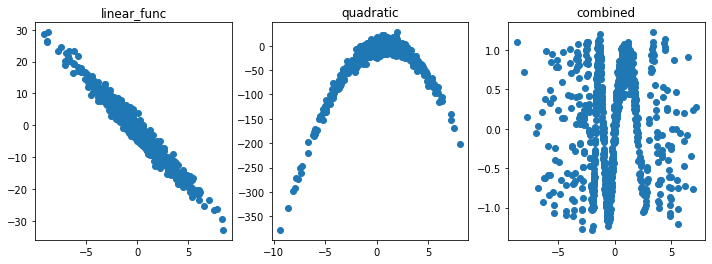

In [ ]:

#Here we generate 3 datasets, using three functions.
#  - linear
#  - quadratic
#  - A combined function
def simulate_data(func,params,n=3000):
  
  x = np.random.uniform(-2,2,size=n//2)
  x2 = np.random.normal(0,3,size=n//2)
  x = np.concatenate([x,x2])
  y = func(x,**params) 
 
  std = y.std()/5

  noise = np.random.normal(0,abs(std),size=n) 
  y = y+noise
  #y =+ noise
  x_train,y_train,x_val,y_val,x_test,y_test = split_val(x,y)
  return x_train,y_train,x_val,y_val,x_test,y_test
def linear_func(x,a,b):
  return x*a +b
def quadratic(x,a,b,c):
  return a*x +b*(x**2) +c
def get_rmse(y_test,y_pred):
  return np.sqrt(sum((y_test-y_pred)**2))

def split_val(x,y,shuffle=True):
  if shuffle:
    idx = np.random.permutation(np.arange(len(x)))
    x,y = x[idx],y[idx]
  n = len(x)//3
  c = []
  for i in range(3):
    c.append((x[n*i:n*(i+1)],y[n*i:n*(i+1)]))
  return c[0][0],c[0][1],c[1][0],c[1][1],c[2][0],c[2][1]
import math,scipy
def combined(x):
  return scipy.sin(-x**2+2*x)


def get_default_args(func):
    signature = inspect.signature(func)
    return {
        k: v.default
        for k, v in signature.parameters.items()
        if v.default is not inspect.Parameter.empty
    }

def generate_params(func,size=False,dist=np.random.normal,dist_params={'loc':0,'scale':3}):
  args =  func.__code__.co_varnames
  default = get_default_args(func)
  params = {}
  for arg in args:
    if arg=='x':
      continue
    if arg in default:
      if arg=='x':
        continue
      v = default[arg]
      if type(v)==type(np.array([])):
        if size==False:
          size = 3
        val = np.random.normal(size=size,**dist_params)
    else:
      val = np.random.normal(**dist_params)
    params[arg] = val
  return params
import inspect

funcs = [linear_func,quadratic,combined]
datasets = {}
n = 3000
for func in funcs:
  params = generate_params(func)
  name = func.__name__
  datasets[name] = simulate_data(func,params=params,n=n)
fig,axes = plt.subplots(1,3)
for num,(name,data) in enumerate(datasets.items()):
  ax = axes[num]
  x_train,y_train,x_val,y_val,x_test,y_test = data
  ax.scatter(x_train,y_train)
  ax.set_title(name)
#fig.tight_layout()
fig.set_size_inches(12,4)

In [ ]:

## First you need to figure out how many neurons you need for each task.
def build_1layer(n_units=5,loss='mse'):
  "Model builds and compiles a 1 layer network with n_units"
  # initialize model
  
  # add layer with n_units
  
  #compile model with loss
  
  return model

# Here is the earlystopping callback we will use making sure the test is efficient.
cb = [nn.callbacks.EarlyStopping(patience=1000)]

def get_early_stopping_acc(history,patience=10):
  val_loss = history.history['val_loss']
  val_loss-val_loss

def run_model(data,model,max_epochs=100):
  "Fits models using early stopping callback."
  t = time.time() # for timing 
  x_train,y_train,x_val,y_val,x_test,y_test = data # unzip data
  # early stop for logging
  early_stopping = nn.callbacks.EarlyStopping(patience=5) 
  history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=max_epochs,callbacks=[early_stopping],verbose=0)
  dt = time.time()-t
  loss = model.evaluate(x_test,y_test,verbose=0)
  return {'t':dt,'loss':loss,'history':history},early_stopping

res = []
import tqdm
for n_units in tqdm.tqdm(range(1,20)):
  for name,data in datasets.items():
    model = build_1layer(n_units)
    d,early_stopping = run_model(data,model)
    d['best_val'] = early_stopping.best
    d['dataset'] = name
    d['n_units'] = n_units
    d['epochs'] = len(d['history'].history['loss'])
    res.append(d)



In [ ]:
# Analyze the results
# Initialize dataframe from the res list.
# Find the n_units with lowest loss for each dataset (using the groupby and sort function)
# Save the best in a dictionary dat2nunits

In [ ]:
## Example of what you need to output:

,,t,loss,best_val,dataset,n_units,epochs
dataset,,,,,,,
combined,23,2.820161,0.445383,0.457526,combined,8,28
linear_func,0,9.851684,42.250240,42.395012,linear_func,1,100
quadratic,19,3.608256,1787.194092,2206.880371,quadratic,7,37


Now do the same but with different optimizers and using the best n_units for the given datasets, as you found above.

In [ ]:
def build_1layer(n_units=5,loss='mse',opt=nn.optimizers.Adam):
  "Model builds and compiles a 1 layer network with n_units and a specified optimizer"
  
  # initizalize model
  # add layer nunits
  # compile model with optimizer opt.
  return model

In [ ]:

# Compile dictionary of optimizers
optimizers = {}
#  your code here 


res_opt = []
for opt_name,opt in tqdm.tqdm(optimizers.items()):
  print(opt_name)
  for name,data in datasets.items():
    n_units = dat2nunits[name] 
    model = build_1layer(n_units,opt=opt)
    d,early_stopping = run_model(data,model)
    d['best_val'] = early_stopping.best
    d['dataset'] = name
    d['n_units'] = n_units 
    d['opt'] = opt_name
    d['epochs'] = len(d['history'].history['loss'])
    res_opt.append(d)




  0%|          | 0/8 [00:00<?, ?it/s]

Adadelta




 12%|█▎        | 1/8 [00:28<03:16, 28.11s/it]

Adagrad




 25%|██▌       | 2/8 [00:56<02:48, 28.06s/it]

Adam




 38%|███▊      | 3/8 [01:06<01:53, 22.70s/it]

Adamax




 50%|█████     | 4/8 [01:34<01:37, 24.32s/it]

Ftrl




 62%|██████▎   | 5/8 [02:02<01:16, 25.42s/it]

SGD




 75%|███████▌  | 6/8 [02:11<00:41, 20.67s/it]

Nadam




 88%|████████▊ | 7/8 [02:32<00:20, 20.58s/it]

RMSprop




100%|██████████| 8/8 [02:45<00:00, 20.63s/it]


In [1]:
# uncomment to look at your results:
#pd.DataFrame(res_opt).groupby(['dataset','opt']).apply(lambda x:x.sort_values('loss').head(1))[['t','loss']]

Which optimizer is the best?

### Overfitting and regularization

When a model *overfits* it means that it memorizes the outcomes for each training data point rather than general patterns.
Thus an overfitted model will score extremely well on the training data but poorly on new unseen data. 
In general, the more flexible a model is the easier it will overfit, and for this reason neural networks are notorious overfitters.
Broadly speaking, the way to combat this is to *regularize* the network.

> **Ex. 4.2.1** To understand overfitting, we overfit some data! Let's fit a neural network to data that has no inherent patterns: *noise*.

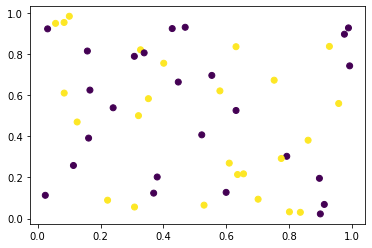

In [ ]:
# Generate some data-points
x = np.random.random(size=(50, 2))
x_val = np.random.random(size=(50, 2))
# And some random outcomes
y = np.random.randint(0, 2, size=(50, ))
y_val = np.random.randint(0, 2, size=(50, ))
# Plot it
plt.scatter(x[:, 0], x[:, 1], c=y)

> Now, create a network that attains an accuracy score over 80% in predicting which points are class 0 and which are class 1.
>
> *Hint*: The bigger the network, the bigger the overfitting.

Plot the training loss and validation loss curve. What does that tell you?

In [ ]:
# define your unregularized model

> **Ex 4.2.2** Norm regularization:
> 1. Apply L2 regularization to your network so that it, across the same number of batches, cannot overfit.
> 2. What does L2 regularization do? Compare the absolute size of weights in the unregularized and regularized model.
>
> *Hint:* `model.weights` will give you a list of weights and bias arrays for each layer. They are in a Tensorflow format but you can call `.numpy()` on them to get them out as numpy arrays.

In [2]:
# Define your regularized model

In [3]:
# print unregularized absolute weight means


In [4]:
# print regularized absolute weight means


Comment on your result

> **Ex 4.2.3** Early stopping: Often we like to monitor the model's performance on a test set also while we train the model.
This allows us to do something called "early stopping" which is a way of regularizing by stopping the training process before the network overfits (we know it overfits when the performance on the training set starts getting much better than on the test set).
Implement early stopping when training on the random data above. What accuracy do you get?
>
> *Hint*: There's an example [here](https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore).

In [5]:
# your code here

> **Ex 4.2.4** Dropout: Another clever way to regularize a network, is to randomly "drop out" some fraction of neurons during each training batch, so the network cannot store memory in specific neurons. The method is called Dropout. Go ahead and take your overfitting model and apply dropout in one or more of the layers and comment on the performance.
>
> *Hint*: Check out the reference [here](https://keras.io/api/layers/regularization_layers/).

In [6]:
# your code here

Now you have tried testing number of neurons and optimizers. If you have time try to experiment with:
- The batchsize (number of examples pr. update)
- The learning rate.
- Callbacks (early stopping, adjust learning rates)
- Using GPUs (In Colab you can switch runtime to a server with GPU)
